In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df=pd.read_csv('dataset/Airbnb_Open_Data.csv')

In [4]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19/10/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21/05/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05/07/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19/11/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26176 entries, 0 to 26175
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26176 non-null  int64  
 1   NAME                            26085 non-null  object 
 2   host id                         26176 non-null  int64  
 3   host_identity_verified          26058 non-null  object 
 4   host name                       26085 non-null  object 
 5   neighbourhood group             26149 non-null  object 
 6   neighbourhood                   26160 non-null  object 
 7   lat                             26168 non-null  float64
 8   long                            26168 non-null  float64
 9   country                         26089 non-null  object 
 10  country code                    26097 non-null  object 
 11  instant_bookable                26097 non-null  object 
 12  cancellation_policy             

In [6]:
df.duplicated().value_counts()

,count
False,26176


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
df = pd.read_csv('dataset/Airbnb_Open_Data.csv', encoding='latin1', low_memory=False)

df['price'] = df['price'].astype(str).str.replace(r'[$,]', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.dropna(subset=['price'], inplace=True)

price_q99 = df['price'].quantile(0.99)
df = df[(df['price'] > 0) & (df['price'] <= price_q99)]

if 'service fee' in df.columns:
    df['service_fee'] = df['service fee'].astype(str).str.replace(r'[$,]', '', regex=True)
    df['service_fee'] = pd.to_numeric(df['service_fee'], errors='coerce')
    df['service_fee'].fillna(0, inplace=True)

if 'reviews per month' in df.columns:
    df['reviews per month'].fillna(0, inplace=True)
if 'review rate number' in df.columns:
    df['review rate number'].fillna(df['review rate number'].median(), inplace=True)

if 'host_identity_verified' in df.columns:
    df['is_verified'] = df['host_identity_verified'].apply(lambda x: 1 if x == 'verified' else 0)

df.dropna(subset=['neighbourhood group', 'room type'], inplace=True)

Data cleaning complete. Final dataset size: 101318 rows.


/tmp/ipython-input-2741435184.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['service_fee'].fillna(0, inplace=True)
/tmp/ipython-input-2741435184.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

/tmp/ipython-input-3044058645.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room type', data=df, palette='viridis', order=df['room type'].value_counts().index)


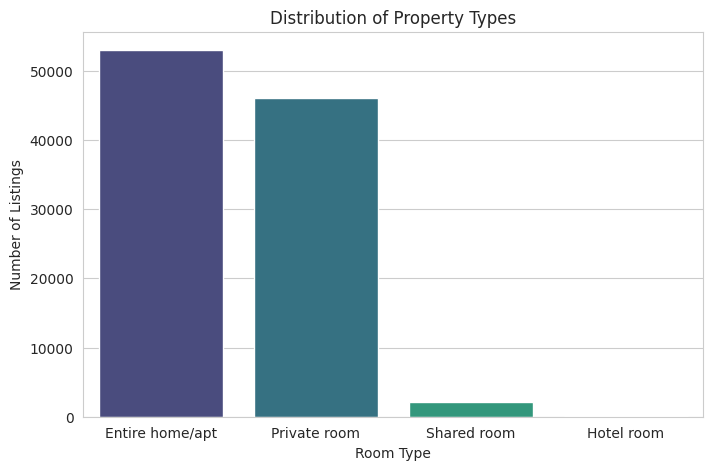

/tmp/ipython-input-3044058645.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='neighbourhood group', data=df, palette='rocket', order=df['neighbourhood group'].value_counts().index)


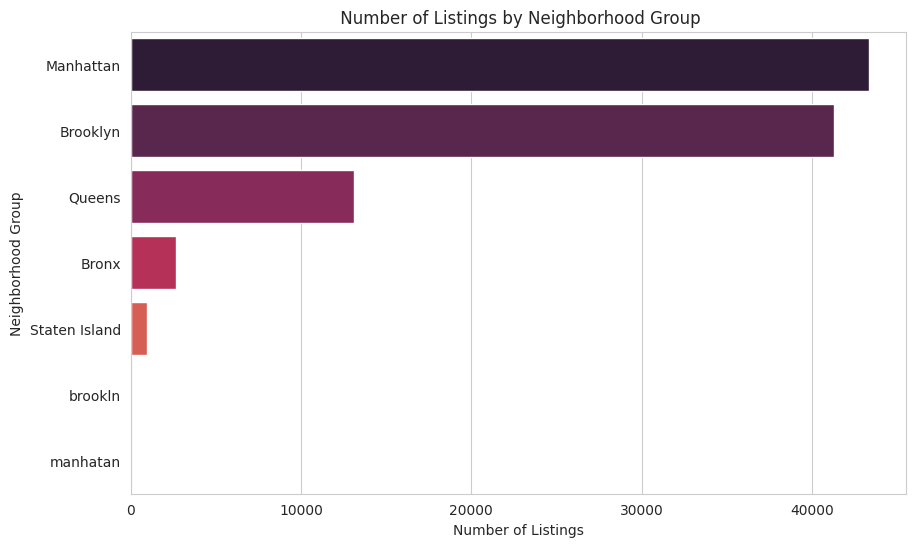

/tmp/ipython-input-3044058645.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_group.values, y=avg_price_by_group.index, palette='mako')


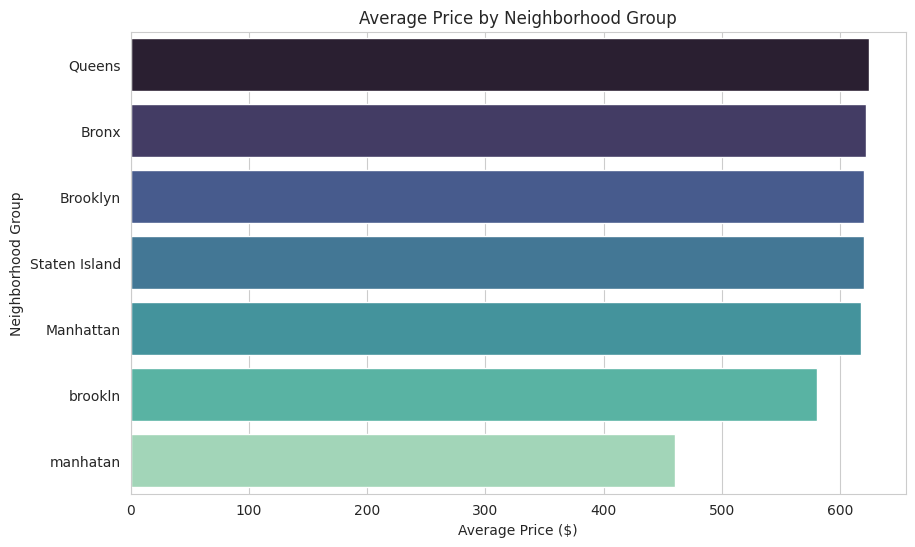

/tmp/ipython-input-3044058645.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hosts.values, y=top_hosts.index.astype(str), palette='cubehelix')


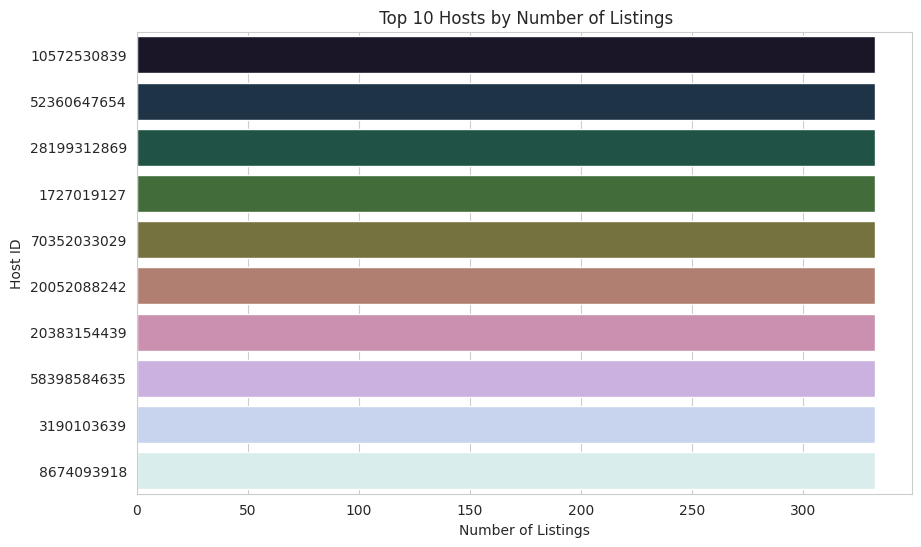

/tmp/ipython-input-3044058645.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=verified_review_rate.index, y=verified_review_rate.values, palette='Accent')


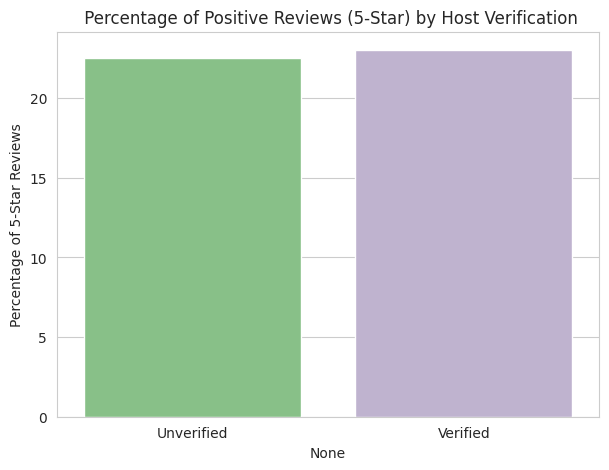

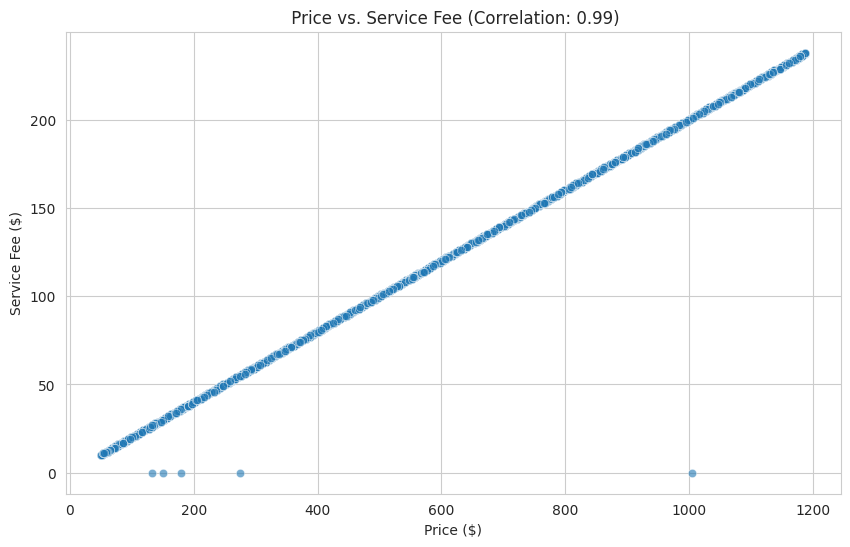

/tmp/ipython-input-3044058645.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room type', y='review rate number', data=df, palette='Pastel1')


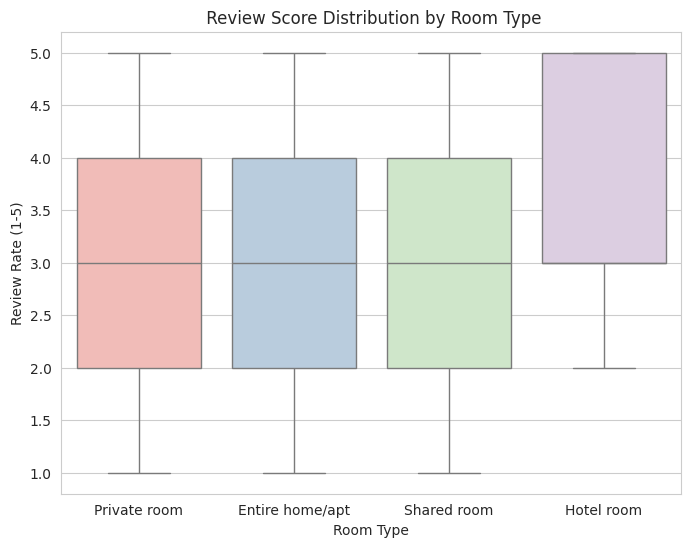

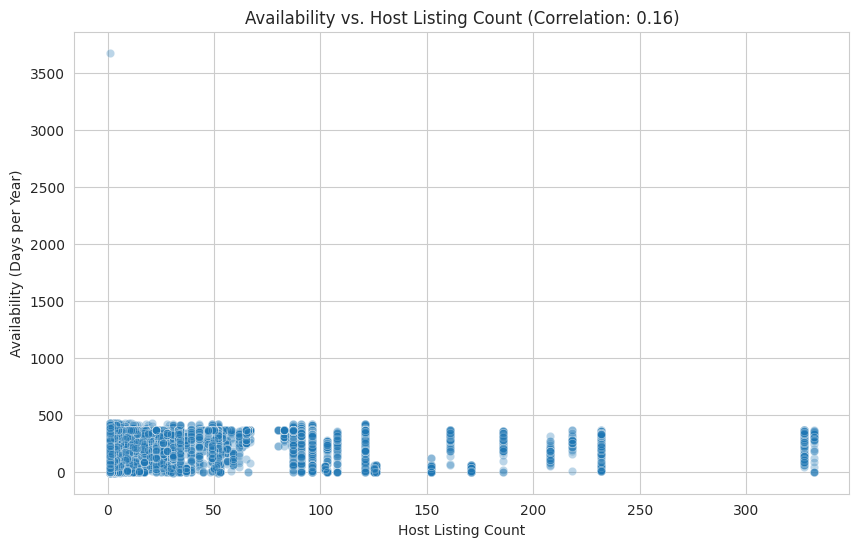

In [5]:
# Q1: What are the different property types in Datasett?
plt.figure(figsize=(8, 5))
sns.countplot(x='room type', data=df, palette='viridis', order=df['room type'].value_counts().index)
plt.title('Distribution of Property Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()

#  Q2: Which neighborhood group has the highest number of listings?
plt.figure(figsize=(10, 6))
sns.countplot(y='neighbourhood group', data=df, palette='rocket', order=df['neighbourhood group'].value_counts().index)
plt.title(' Number of Listings by Neighborhood Group')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood Group')
plt.show()

#  Q3: Which neighborhood group has the highest average price?
avg_price_by_group = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_group.values, y=avg_price_by_group.index, palette='mako')
plt.title('Average Price by Neighborhood Group')
plt.xlabel('Average Price ($)')
plt.ylabel('Neighborhood Group')
plt.show()

# Q4: Is there a relationship between construction year and price?
if 'construction year' in df.columns and pd.api.types.is_numeric_dtype(df['construction year']):
    # Filter for realistic years (e.g., after 1800)
    reasonable_year_df = df[df['construction year'] > 1800]
    correlation = reasonable_year_df['construction year'].corr(reasonable_year_df['price'])
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='construction year', y='price', data=reasonable_year_df.sample(min(5000, len(reasonable_year_df))), alpha=0.5)
    plt.title(f' Price vs. Construction Year (Correlation: {correlation:.2f})')
    plt.xlabel('Construction Year')
    plt.ylabel('Price ($)')
    plt.show()

#Q5: Who are the top 10 hosts by listing count?
if 'host id' in df.columns and 'calculated host listings count' in df.columns:
    top_hosts = df.groupby('host id')['calculated host listings count'].max().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_hosts.values, y=top_hosts.index.astype(str), palette='cubehelix')
    plt.title(' Top 10 Hosts by Number of Listings')
    plt.xlabel('Number of Listings')
    plt.ylabel('Host ID')
    plt.show()

# Q6: Are verified hosts more likely to receive positive reviews?
if 'is_verified' in df.columns and 'review rate number' in df.columns:

    df['is_positive_review'] = (df['review rate number'] == 5).astype(int)
    verified_review_rate = df.groupby('is_verified')['is_positive_review'].mean() * 100
    verified_review_rate.index = ['Unverified', 'Verified']
    plt.figure(figsize=(7, 5))
    sns.barplot(x=verified_review_rate.index, y=verified_review_rate.values, palette='Accent')
    plt.title(' Percentage of Positive Reviews (5-Star) by Host Verification')
    plt.ylabel('Percentage of 5-Star Reviews')
    plt.show()

# Q7. Is there a correlation between price and service fee?
if 'service_fee' in df.columns:
    correlation_fee = df['price'].corr(df['service_fee'])
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='price', y='service_fee', data=df.sample(min(5000, len(df))), alpha=0.6)
    plt.title(f' Price vs. Service Fee (Correlation: {correlation_fee:.2f})')
    plt.xlabel('Price ($)')
    plt.ylabel('Service Fee ($)')
    plt.show()

# Q8. How do review rates vary by room type?
if 'review rate number' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='room type', y='review rate number', data=df, palette='Pastel1')
    plt.title(' Review Score Distribution by Room Type')
    plt.xlabel('Room Type')
    plt.ylabel('Review Rate (1-5)')
    plt.show()

# 9. Do hosts with more listings have higher availability?
if 'calculated host listings count' in df.columns and 'availability 365' in df.columns:
    correlation_avail = df['calculated host listings count'].corr(df['availability 365'])
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='calculated host listings count', y='availability 365', data=df, alpha=0.3)
    plt.title(f'Availability vs. Host Listing Count (Correlation: {correlation_avail:.2f})')
    plt.xlabel('Host Listing Count')
    plt.ylabel('Availability (Days per Year)')
    plt.show()

In [4]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.15952226322486857)